In [2]:
import networkx as nx
import numpy as np
import grakel as gk
import matplotlib
import scipy
import string
import pandas as pd
import matplotlib.pyplot as plt
import time
import math
from datetime import datetime
# %reset
# load script
import MMDforGraphs as mg




This notebook plays around with graph kernels and kernel mmd bootstrap test.   



In [3]:
alpha = 0.05

# Create samples
At the current state of the code, the sampling has to be run every time before a kernel is fit.

## Binomial




In [91]:
n = 20
m = 20
nr_nodes_1 = 50
nr_nodes_2 = 50
p_edge_1 = 0.5
p_edge_2 = 0.51


label_1 = dict( ( (i, 'a') for i in range(nr_nodes_1) ) )
label_2 = dict( ( (i, 'a') for i in range(nr_nodes_2) ) )

Gs = mg.GraphTwoSample(n = n, m = m, type1 ="binomial", type2 = "binomial", nr_nodes_1 = nr_nodes_1, nr_nodes_2 = nr_nodes_2, p_edge_1 = p_edge_1 , p_edge_2 = p_edge_2, label_1 =label_1, label_2 = label_2)

graph_list = gk.graph_from_networkx(Gs, node_labels_tag='label')

# Weisfeiler-Lehman Shortest Path Kernel


Calculate the kernel

In [92]:
start_time = time.time()
kernel_wlsp = [{"name": "WL", "n_iter": 5}, {"name": "shortest_path"}] #
graph_list = gk.graph_from_networkx(Gs, node_labels_tag='label')
K_wlsp = mg.KernelMatrix(graph_list, kernel_wlsp, True)
print("--- %s seconds ---" % (time.time() - start_time))

--- 7.534083843231201 seconds ---


Because we are assuming an i.i.d sample we can simply bootstrap the kernel matrix

In [93]:
# Calculate the mmd value for the sample
p_b_value, p_u_value, mmd_b_null, mmd_u_null, mmd_b_sample, mmd_u_sample = mg.BootstrapPval(B = 1000, K = K_wlsp , n = n, m = m, seed = 123)


In [94]:
print("Biased p-value: " + str(p_b_value))
print("Unbiased p-value: " + str(p_u_value))
print("Biased hypothesis acceped:" + str(mmd_b_sample < (math.sqrt(2*K_wlsp.max()/n))*(1 + math.sqrt(2*math.log(1/alpha)))))
print("Unbiased hypothesis acceped:" + str(mmd_u_sample < (4*K_wlsp.max()/math.sqrt(n))*math.sqrt(math.log(1/alpha))))

Biased p-value: 0.67
Unbiased p-value: 0.67
Biased hypothesis acceped:True
Unbiased hypothesis acceped:True


# Weisfeiler-Lehman Subtree Kernel

In [12]:
start_time = time.time()
kernel_wlst = [{"name": "weisfeiler_lehman", "n_iter": 5}, {"name": "vertex_histogram"}] #
graph_list = gk.graph_from_networkx(Gs, node_labels_tag='label')
K_wlst = mg.KernelMatrix(graph_list, kernel_wlst, True)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.019945621490478516 seconds ---


In [13]:
p_b_value, p_u_value, mmd_b_null, mmd_u_null, mmd_b_sample, mmd_u_sample = mg.BootstrapPval(B = 1000, K = K_wlst, n = n, m = m, seed = 123)

In [14]:
print("Biased p-value: " + str(p_b_value))
print("Unbiased p-value: " + str(p_u_value))
print("Biased hypothesis acceped:" + str(mmd_b_sample < (math.sqrt(2*K_wlsp.max()/n))*(1 + math.sqrt(2*math.log(1/alpha)))))
print("Unbiased hypothesis acceped:" + str(mmd_u_sample < (4*K_wlsp.max()/math.sqrt(n))*math.sqrt(math.log(1/alpha))))

Biased p-value: 0.204
Unbiased p-value: 0.204
Biased hypothesis acceped:True
Unbiased hypothesis acceped:True


# Weisfeiler-Lehman Optimal Assignment
For strong base kernels the optimal assignment yields a valid kernel


In [15]:
start_time = time.time()
kernel_wloa = [{"name": "WL-OA", "n_iter": 5}] 
graph_list = gk.graph_from_networkx(Gs, node_labels_tag='label')
K_wloa = mg.KernelMatrix(graph_list, kernel_wloa, True)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.038897037506103516 seconds ---


In [16]:
p_b_value, p_u_value, mmd_b_null, mmd_u_null, mmd_b_sample, mmd_u_sample = mg.BootstrapPval(B = 1000, K = K_wloa, n = n, m = m, seed = 123)

In [18]:
print("Biased p-value: " + str(p_b_value))
print("Unbiased p-value: " + str(p_u_value))
print("Biased hypothesis acceped:" + str(mmd_b_sample < (math.sqrt(2*K_wlsp.max()/n))*(1 + math.sqrt(2*math.log(1/alpha)))))
print("Unbiased hypothesis acceped:" + str(mmd_u_sample < (4*K_wlsp.max()/math.sqrt(n))*math.sqrt(math.log(1/alpha))))

Biased p-value: 0.179
Unbiased p-value: 0.181
Biased hypothesis acceped:True
Unbiased hypothesis acceped:True


# Shortest-Path Kernel

In [21]:
kernel_sp = [{"name": "shortest_path", "with_labels": False}] 
graph_list = gk.graph_from_networkx(Gs, node_labels_tag='label')
K_sp = mg.KernelMatrix(graph_list, kernel_sp, True)

In [22]:
p_b_value, p_u_value, mmd_b_null, mmd_u_null, mmd_b_sample, mmd_u_sample = mg.BootstrapPval(B = 1000, K = K_sp, n = n, m = m, seed = 123)

In [23]:
print("Biased p-value: " + str(p_b_value))
print("Unbiased p-value: " + str(p_u_value))
print("Biased hypothesis acceped:" + str(mmd_b_sample < (math.sqrt(2*K_wlsp.max()/n))*(1 + math.sqrt(2*math.log(1/alpha)))))
print("Unbiased hypothesis acceped:" + str(mmd_u_sample < (4*K_wlsp.max()/math.sqrt(n))*math.sqrt(math.log(1/alpha))))

Biased p-value: 0.878
Unbiased p-value: 0.878
Biased hypothesis acceped:True
Unbiased hypothesis acceped:True


# Random Walk

In [24]:
kernel_rw = [{"name": "random_walk", "lambda": 0.1}] 
graph_list = gk.graph_from_networkx(Gs, node_labels_tag='label')
K_rw = mg.KernelMatrix(graph_list, kernel_sp, True)

In [25]:
p_b_value, p_u_value, mmd_b_null, mmd_u_null, mmd_b_sample, mmd_u_sample = mg.BootstrapPval(B = 1000, K = K_rw, n = n, m = m, seed = 123)

In [26]:
print("Biased p-value: " + str(p_b_value))
print("Unbiased p-value: " + str(p_u_value))
print("Biased hypothesis acceped:" + str(mmd_b_sample < (math.sqrt(2*K_wlsp.max()/n))*(1 + math.sqrt(2*math.log(1/alpha)))))
print("Unbiased hypothesis acceped:" + str(mmd_u_sample < (4*K_wlsp.max()/math.sqrt(n))*math.sqrt(math.log(1/alpha))))

Biased p-value: 0.878
Unbiased p-value: 0.878
Biased hypothesis acceped:True
Unbiased hypothesis acceped:True


# Binomial small Probabilities 10 samples

In [95]:
df_Binomial_WLOA = pd.read_pickle("data/run_wl_oa_10samples_p05.pkl")
#df_Binomial_WLOA.head(20)

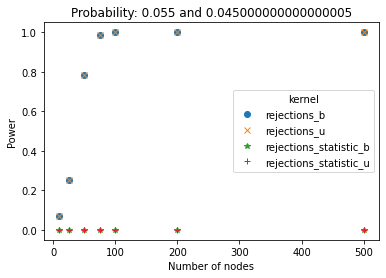

In [96]:
fig, ax = plt.subplots()

p = 0.055


lines, = ax.plot(df_Binomial_WLOA['nr_nodes_1'].loc[(df_Binomial_WLOA['p_edge_1'] == p)], 
            df_Binomial_WLOA['rejections_b'].loc[(df_Binomial_WLOA['p_edge_1'] == p)], 'o', label='rejections_b')
lines, = ax.plot(df_Binomial_WLOA['nr_nodes_1'].loc[(df_Binomial_WLOA['p_edge_1'] == p)], 
            df_Binomial_WLOA['rejections_u'].loc[(df_Binomial_WLOA['p_edge_1'] == p)], 'x', label='rejections_u')
lines, = ax.plot(df_Binomial_WLOA['nr_nodes_1'].loc[(df_Binomial_WLOA['p_edge_1'] == p)], 
            df_Binomial_WLOA['rejections_statistic_b'].loc[(df_Binomial_WLOA['p_edge_1'] == p)], '*', label='rejections_statistic_b')
lines, = ax.plot(df_Binomial_WLOA['nr_nodes_1'].loc[(df_Binomial_WLOA['p_edge_1'] == p)], 
            df_Binomial_WLOA['rejections_statistic_u'].loc[(df_Binomial_WLOA['p_edge_1'] == p)], '+', label='rejections_statistic_u')



ax.legend(title = 'kernel')
ax.set_title("Probability: " + str(0.05 + round((p-0.05),3)) + " and " + str(0.05 - round((p-0.05),3)))
ax.set_xlabel('Number of nodes')
ax.set_ylabel('Power')
plt.show()

# Binomial small Probabilities 5 samples

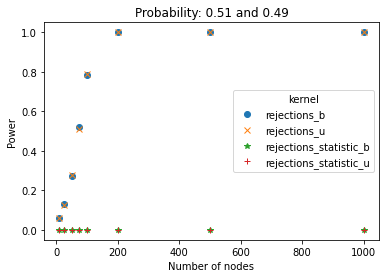

In [97]:
df_Binomial_WLOA = pd.read_pickle("data/run_wl_oa_5samples.pkl")
#df_Binomial_WLOA.head(10)

fig, ax = plt.subplots()

p = 0.51


lines, = ax.plot(df_Binomial_WLOA['nr_nodes_1'].loc[(df_Binomial_WLOA['p_edge_1'] == p)], 
            df_Binomial_WLOA['rejections_b'].loc[(df_Binomial_WLOA['p_edge_1'] == p)], 'o', label='rejections_b')
lines, = ax.plot(df_Binomial_WLOA['nr_nodes_1'].loc[(df_Binomial_WLOA['p_edge_1'] == p)], 
            df_Binomial_WLOA['rejections_u'].loc[(df_Binomial_WLOA['p_edge_1'] == p)], 'x', label='rejections_u')
lines, = ax.plot(df_Binomial_WLOA['nr_nodes_1'].loc[(df_Binomial_WLOA['p_edge_1'] == p)], 
            df_Binomial_WLOA['rejections_statistic_b'].loc[(df_Binomial_WLOA['p_edge_1'] == p)], '*', label='rejections_statistic_b')
lines, = ax.plot(df_Binomial_WLOA['nr_nodes_1'].loc[(df_Binomial_WLOA['p_edge_1'] == p)], 
            df_Binomial_WLOA['rejections_statistic_u'].loc[(df_Binomial_WLOA['p_edge_1'] == p)], '+', label='rejections_statistic_u')



ax.legend(title = 'kernel')
ax.set_title("Probability: " + str(0.5 + round((p-0.5),3)) + " and " + str(0.5 - round((p-0.5),3)))
ax.set_xlabel('Number of nodes')
ax.set_ylabel('Power')
plt.show()

#  Different Number of nodes


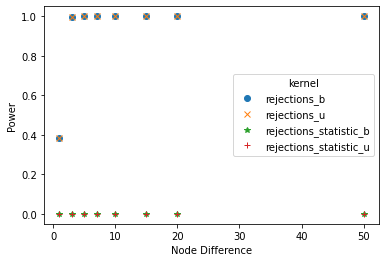

In [37]:
fig, ax = plt.subplots()

df_Binomial_WLOA['Node_diff'] = df_Binomial_WLOA['nr_nodes_2'] - df_Binomial_WLOA['nr_nodes_1']

ax.plot(df_Binomial_WLOA['Node_diff'], df_Binomial_WLOA['rejections_b'], 'o', label='rejections_b')
ax.plot(df_Binomial_WLOA['Node_diff'], df_Binomial_WLOA['rejections_u'], 'x', label='rejections_u')
ax.plot(df_Binomial_WLOA['Node_diff'], df_Binomial_WLOA['rejections_statistic_b'], '*', label='rejections_statistic_b')
ax.plot(df_Binomial_WLOA['Node_diff'], df_Binomial_WLOA['rejections_statistic_u'], '+', label='rejections_statistic_u')

ax.legend(title = 'kernel')
ax.set_xlabel('Node Difference')
ax.set_ylabel('Power')
plt.show()

# Stochastic block model
Let's look at a stochastic block model.

In [86]:
df_Binomial_WLOA = pd.read_pickle("data/run_wl_oa_10samples_SBM.pkl")
df_Binomial_WLOA.head(10)

,kernel,m,n,nr_nodes_1,nr_nodes_2,p_diff,p_edge_1,p_edge_2,rejections_b,rejections_statistic_b,rejections_statistic_u,rejections_u,run_info,run_time,timestap
0,shortest_path,10.0,10.0,"[30, 30, 40]","[30, 30, 40]",0.00,[[0.25 0.05 0.02]\n [0.05 0.35 0.07]\n [0.02 0...,[[0.25 0.05 0.02]\n [0.05 0.35 0.07]\n [0.02 0...,0.040,0.0,0.0,0.040,"B:500,N:500,wl_itr:3",0:00:56.384240,2021-03-29 12:59:11.622107
1,shortest_path,10.0,10.0,"[30, 30, 40]","[30, 30, 40]",0.01,[[0.25 0.05 0.02 ]\n [0.05 0.35 0.07 ]\n [...,[[0.25 0.05 0.02 ]\n [0.05 0.35 0.07 ]\n [...,0.068,0.0,0.0,0.070,"B:500,N:500,wl_itr:3",0:00:58.106238,2021-03-29 12:59:11.622107
2,shortest_path,10.0,10.0,"[30, 30, 40]","[30, 30, 40]",0.02,[[0.25 0.05 0.02]\n [0.05 0.35 0.07]\n [0.02 0...,[[0.25 0.05 0.02]\n [0.05 0.35 0.07]\n [0.02 0...,0.130,0.0,0.0,0.128,"B:500,N:500,wl_itr:3",0:00:59.702413,2021-03-29 12:59:11.622107
3,shortest_path,10.0,10.0,"[30, 30, 40]","[30, 30, 40]",0.03,[[0.25 0.05 0.02 ]\n [0.05 0.35 0.07 ]\n [...,[[0.25 0.05 0.02 ]\n [0.05 0.35 0.07 ]\n [...,0.318,0.0,0.0,0.320,"B:500,N:500,wl_itr:3",0:00:59.521836,2021-03-29 12:59:11.622107
4,shortest_path,10.0,10.0,"[30, 30, 40]","[30, 30, 40]",0.04,[[0.25 0.05 0.02]\n [0.05 0.35 0.07]\n [0.02 0...,[[0.25 0.05 0.02]\n [0.05 0.35 0.07]\n [0.02 0...,0.586,0.0,0.0,0.586,"B:500,N:500,wl_itr:3",0:00:59.883868,2021-03-29 12:59:11.622107
5,shortest_path,10.0,10.0,"[30, 30, 40]","[30, 30, 40]",0.09,[[0.25 0.05 0.02 ]\n [0.05 0.35 0.07 ]\n [...,[[0.25 0.05 0.02 ]\n [0.05 0.35 0.07 ]\n [...,1.000,0.0,0.0,1.000,"B:500,N:500,wl_itr:3",0:00:59.773751,2021-03-29 12:59:11.622107


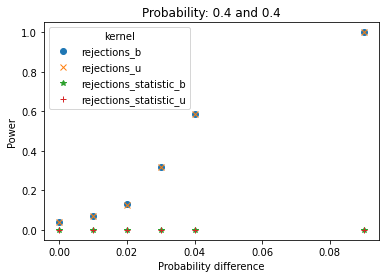

In [89]:


fig, ax = plt.subplots()


ax.plot(df_Binomial_WLOA['p_diff'], df_Binomial_WLOA['rejections_b'], 'o', label='rejections_b')
ax.plot(df_Binomial_WLOA['p_diff'], df_Binomial_WLOA['rejections_u'], 'x', label='rejections_u')
ax.plot(df_Binomial_WLOA['p_diff'], df_Binomial_WLOA['rejections_statistic_b'], '*', label='rejections_statistic_b')
ax.plot(df_Binomial_WLOA['p_diff'], df_Binomial_WLOA['rejections_statistic_u'], '+', label='rejections_statistic_u')

ax.legend(title = 'kernel')
ax.set_title("Probability: " + str(0.4 + round((p-0.4),3)) + " and " + str(0.4 - round((p-0.4),3)))
ax.set_xlabel('Probability difference')
ax.set_ylabel('Power')
plt.show()